
# 🌾 Weather Data Recorder for AgriWeather Insights


This project is a weather data recording and trend analysis tool for *AgriWeather Insights*, designed to help farmers and agri-service providers plan better by tracking and analyzing weather patterns.

---


## Project Objective

- To build a robust system that records **daily weather data** (Date, Temperature, Condition).
- Analyze trends using **Pandas** (e.g., average temperature, most common weather).
- Prevent **duplicate entries** using `set()`.
- Enable **CSV export** for storage and reporting.
- All logic implemented with detailed code and markdowns in **Google Colab** — ready for internship-level submission.



##  Tools & Technologies Used

- **Python 3.10+**
- **Pandas** for data management
- **Matplotlib** for data visualization
- **Google Colab** for development and presentation

_No external datasets used. Sample entries are generated manually or by the user._


##  Sample Weather Data (10 Entries)

We use this dataset to simulate real-world entries. You can replace it or continue building on it.


In [1]:

import pandas as pd

# Load and preview sample weather data
df = pd.read_csv("/content/sample_weather_data.csv")
df.head(10)


,Date,Temperature (°C),Condition
0,2025-07-09,25.8,Foggy
1,2025-07-10,22.2,Rainy
2,2025-07-11,31.0,Windy
3,2025-07-12,25.9,Windy
4,2025-07-13,33.4,Foggy
5,2025-07-14,27.2,Rainy
6,2025-07-15,32.7,Rainy
7,2025-07-16,30.5,Rainy
8,2025-07-17,34.0,Stormy
9,2025-07-18,29.9,Cloudy



##  Unique Date Tracker

We use a Python set to store unique dates and avoid duplicate records.


In [2]:

# Initialize set of existing dates from the sample
unique_dates = set(df["Date"].tolist())
unique_dates


{'2025-07-09',
 '2025-07-10',
 '2025-07-11',
 '2025-07-12',
 '2025-07-13',
 '2025-07-14',
 '2025-07-15',
 '2025-07-16',
 '2025-07-17',
 '2025-07-18'}


## Add New Weather Record

This function ensures:
- Date is valid (format: YYYY-MM-DD)
- Date is not duplicated
- Temperature is a valid float


In [3]:

from datetime import datetime

def add_weather_record(date_str, temperature, condition):
    try:
        datetime.strptime(date_str, "%Y-%m-%d")
    except ValueError:
        return "❌ Invalid date format. Use YYYY-MM-DD."

    if date_str in unique_dates:
        return "⚠️ Entry for this date already exists."

    try:
        temp = float(temperature)
    except ValueError:
        return "❌ Temperature must be a number."

    # Append the entry
    global df
    new_row = {"Date": date_str, "Temperature (°C)": temp, "Condition": condition}
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    unique_dates.add(date_str)
    return "✅ Record added successfully!"



## View Updated Weather Data


In [4]:

df.tail(10)  # Show last 10 entries


,Date,Temperature (°C),Condition
0,2025-07-09,25.8,Foggy
1,2025-07-10,22.2,Rainy
2,2025-07-11,31.0,Windy
3,2025-07-12,25.9,Windy
4,2025-07-13,33.4,Foggy
5,2025-07-14,27.2,Rainy
6,2025-07-15,32.7,Rainy
7,2025-07-16,30.5,Rainy
8,2025-07-17,34.0,Stormy
9,2025-07-18,29.9,Cloudy


##  Weather Trend Analysis

We analyze average temperature and most common weather condition.


In [5]:

avg_temp = df["Temperature (°C)"].mean()
common_condition = df["Condition"].mode()[0]

print(f"🌡️ Average Temperature: {avg_temp:.2f} °C")
print(f"🌤️ Most Common Condition: {common_condition}")


🌡️ Average Temperature: 29.26 °C
🌤️ Most Common Condition: Rainy



##  Visualize Temperature Trends


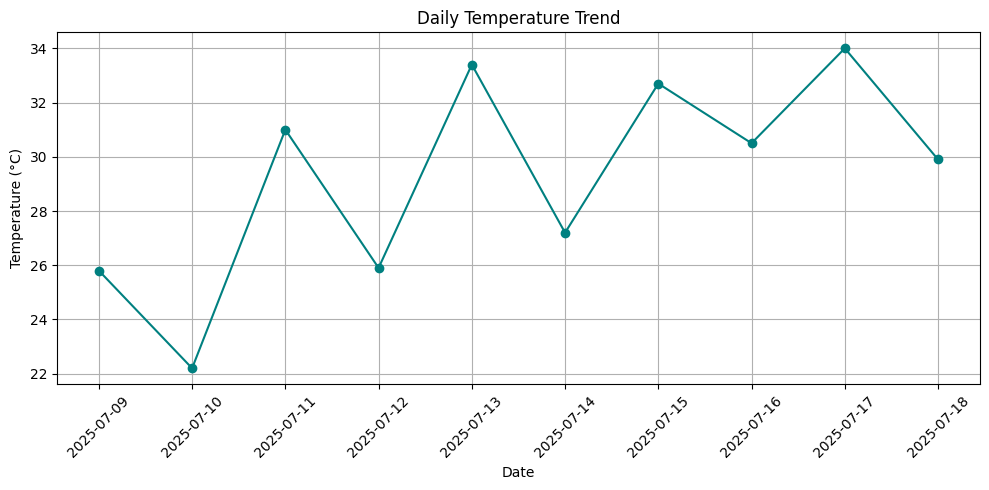

In [6]:

import matplotlib.pyplot as plt

df_sorted = df.sort_values("Date")
plt.figure(figsize=(10, 5))
plt.plot(df_sorted["Date"], df_sorted["Temperature (°C)"], marker='o', linestyle='-', color='teal')
plt.xticks(rotation=45)
plt.title("Daily Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Export to CSV

This saves the data with a timestamped filename for recordkeeping.


In [7]:

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"weather_data_{timestamp}.csv"
df.to_csv(filename, index=False)
print(f"✅ Data exported to {filename}")


✅ Data exported to weather_data_20250718_182956.csv
